In [1]:
import numpy.polynomial.polynomial as poly
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/LTC-USD.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-26,273.108002,289.510986,272.261993,286.503998,286.503998,842993024
1,2017-12-27,286.588989,290.944000,264.423004,272.174011,272.174011,777137984
2,2017-12-28,272.126007,273.177002,231.376999,249.929993,249.929993,2593240064
3,2017-12-29,250.352005,258.040985,238.332993,245.501999,245.501999,1392210048
4,2017-12-30,245.087006,245.432999,208.197006,218.962997,218.962997,943667008
...,...,...,...,...,...,...,...
1822,2022-12-22,65.399422,66.514549,64.517052,66.151672,66.151672,368489876
1823,2022-12-23,66.152802,66.596397,65.450348,65.772224,65.772224,306694378
1824,2022-12-24,65.772232,66.012245,65.263176,65.774788,65.774788,178396939
1825,2022-12-25,65.774750,69.363144,65.540604,69.206268,69.206268,335124962


In [3]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
1822,2022-12-22,66.151672
1823,2022-12-23,65.772224
1824,2022-12-24,65.774788
1825,2022-12-25,69.206268
1826,2022-12-26,70.684746


In [4]:
df['Time'] = np.arange(len(df.index))
df.tail()

<ipython-input-4-7104d57264a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = np.arange(len(df.index))


,Date,Close,Time
1822,2022-12-22,66.151672,1822
1823,2022-12-23,65.772224,1823
1824,2022-12-24,65.774788,1824
1825,2022-12-25,69.206268,1825
1826,2022-12-26,70.684746,1826


In [5]:
df['Date_New'] = pd.to_datetime(df.Date)
type(df['Date_New'])

<ipython-input-5-a1d1c68ad423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_New'] = pd.to_datetime(df.Date)


pandas.core.series.Series

In [6]:
df['Date_New'] = pd.to_datetime(df.Date)
type(df['Date_New'])

<ipython-input-6-a1d1c68ad423>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_New'] = pd.to_datetime(df.Date)


pandas.core.series.Series

In [7]:
df.index = df['Date_New']
df

,Date,Close,Time,Date_New
Date_New,,,,
2017-12-26,2017-12-26,286.503998,0,2017-12-26
2017-12-27,2017-12-27,272.174011,1,2017-12-27
2017-12-28,2017-12-28,249.929993,2,2017-12-28
2017-12-29,2017-12-29,245.501999,3,2017-12-29
2017-12-30,2017-12-30,218.962997,4,2017-12-30
...,...,...,...,...
2022-12-22,2022-12-22,66.151672,1822,2022-12-22
2022-12-23,2022-12-23,65.772224,1823,2022-12-23
2022-12-24,2022-12-24,65.774788,1824,2022-12-24


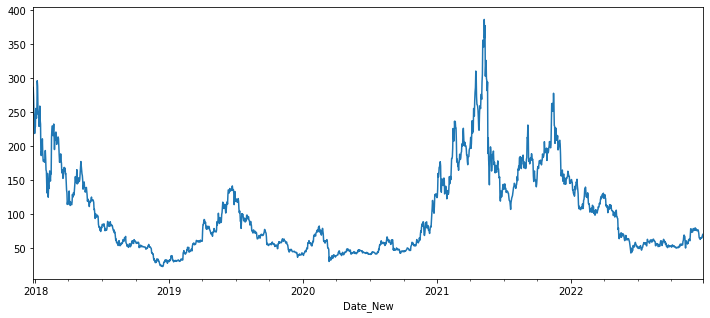

In [8]:
df['Close'].plot(figsize=(12,5))

In [9]:
no_of_predictions = 30
Date_future = pd.date_range(start = "27/12/2022",end = "25/01/2023")
X = np.array(df.Time, dtype = float)
y = np.array(df.Close, dtype = float)
Z = [1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865]

In [10]:
coefs = poly.polyfit(X, y, 9)
x_new = np.linspace(X[0], X[-1] + no_of_predictions, num = len(X) + no_of_predictions)
ffit = poly.polyval(x_new, coefs)
fit = poly.polyval(y, coefs)
pred = poly.polyval(Z, coefs)
predictions = pd.DataFrame(Date_future,pred)
print(predictions)

                   0
59.307630 2022-12-27
58.759651 2022-12-28
58.190138 2022-12-29
57.598684 2022-12-30
56.984879 2022-12-31
56.348307 2023-01-01
55.688550 2023-01-02
55.005183 2023-01-03
54.297780 2023-01-04
53.565908 2023-01-05
52.809131 2023-01-06
52.027006 2023-01-07
51.219090 2023-01-08
41.620182 2023-01-09
40.497868 2023-01-10
39.344063 2023-01-11
38.158260 2023-01-12
36.939950 2023-01-13
35.688617 2023-01-14
34.403741 2023-01-15
33.084797 2023-01-16
31.731255 2023-01-17
30.342580 2023-01-18
28.918232 2023-01-19
27.457667 2023-01-20
25.960333 2023-01-21
24.425676 2023-01-22
22.853135 2023-01-23
21.242146 2023-01-24
19.592136 2023-01-25


In [11]:
date_new = df.index.append(Date_future)
date_new

DatetimeIndex(['2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31', '2018-01-01', '2018-01-02',
               '2018-01-03', '2018-01-04',
               ...
               '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23',
               '2023-01-24', '2023-01-25'],
              dtype='datetime64[ns]', length=1857, freq=None)

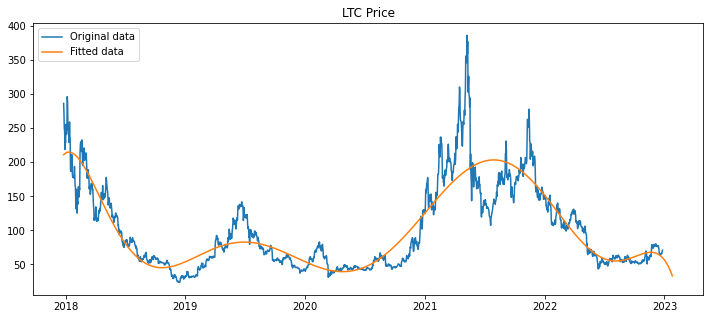

In [12]:
plt.figure(figsize = (12,5))
plt.title('LTC Price')
plt.plot(df['Date_New'], y, label = "Original data")
plt.plot(date_new, ffit, label = "Fitted data")
plt.legend(loc = 'upper left')
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mape = mean_absolute_percentage_error(df['Close'],fit)
mae = mean_absolute_error(df['Close'],fit)
print("MAPE: ", mape * 100)
print("MAE: ", mae)

MAPE:  178.95021785675831
MAE:  112.85378331814687


In [14]:
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Close'],fit)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)


RMSE:  125.92606328179639
